In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
models = ['rf', 'dt', 'knn', 'xgb', 'lr', 'nb', 'mlp', 'svm']
features = ['%sys', '%memused']

In [3]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys_mean" : df[features].describe()['%sys']['mean'], 
                    "sys_std"  : df[features].describe()['%sys']['std'], 
                    "sys_max"  : df[features].describe()['%sys']['max'], 
                    "sys_min"  : df[features].describe()['%sys']['min'],
                    "mem_mean" : df[features].describe()['%memused']['mean'], 
                    "mem_std"  : df[features].describe()['%memused']['std'], 
                    "mem_max"  : df[features].describe()['%memused']['max'], 
                    "mem_min"  : df[features].describe()['%memused']['min']
                  }


In [4]:
df.columns.values

array(['# hostname', 'interval', 'timestamp', 'CPU', '%usr', '%nice',
       '%sys', '%iowait', '%steal', '%irq', '%soft', '%guest', '%gnice',
       '%idle[...]', 'kbmemfree', 'kbavail', 'kbmemused', '%memused',
       'kbbuffers', 'kbcached', 'kbcommit', '%commit', 'kbactive',
       'kbinact', 'kbdirty', 'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl',
       'kbvmused', 'IFACE', 'rxpck/s', 'txpck/s', 'rxkB/s', 'txkB/s',
       'rxcmp/s', 'txcmp/s', 'rxmcst/s', '%ifutil[...]', 'IFACE.1',
       'rxerr/s', 'txerr/s', 'coll/s', 'rxdrop/s', 'txdrop/s', 'txcarr/s',
       'rxfram/s', 'rxfifo/s', 'txfifo/s[...]', 'call/s', 'retrans/s',
       'read/s', 'write/s', 'access/s', 'getatt/s', 'scall/s',
       'badcall/s', 'packet/s', 'udp/s', 'tcp/s', 'hit/s', 'miss/s',
       'sread/s', 'swrite/s', 'saccess/s', 'sgetatt/s', 'totsck',
       'tcpsck', 'udpsck', 'rawsck', 'ip-frag', 'tcp-tw', 'irec/s',
       'fwddgm/s', 'idel/s', 'orq/s', 'asmrq/s', 'asmok/s', 'fragok/s',
       'fragcrt/s', 'ihd

In [5]:
# features with variance greater than zero
m=df.var()>0
df_filtered = df.loc[:, m.reindex(df.columns, axis=1, fill_value=False)]
df_filtered.columns.values

array(['%usr', '%sys', '%iowait', '%soft', '%idle[...]', 'kbmemfree',
       'kbavail', 'kbmemused', '%memused', 'kbbuffers', 'kbcached',
       'kbcommit', '%commit', 'kbactive', 'kbinact', 'kbdirty',
       'kbanonpg', 'kbslab', 'kbkstack', 'kbpgtbl', 'kbvmused', 'rxpck/s',
       'txpck/s', 'rxkB/s', 'txkB/s', '%ifutil[...]', 'totsck', 'irec/s',
       'idel/s', 'orq/s', 'passive/s', 'iseg/s', 'oseg/s', 'tcp6sck',
       'total/s'], dtype=object)

In [6]:
x_pos = np.arange(len(models))
sys_mean = [value['sys_mean'] for value in data.values()]
sys_std = [value['sys_std'] for value in data.values()]

In [7]:
plt.style.use('plot_style.txt')

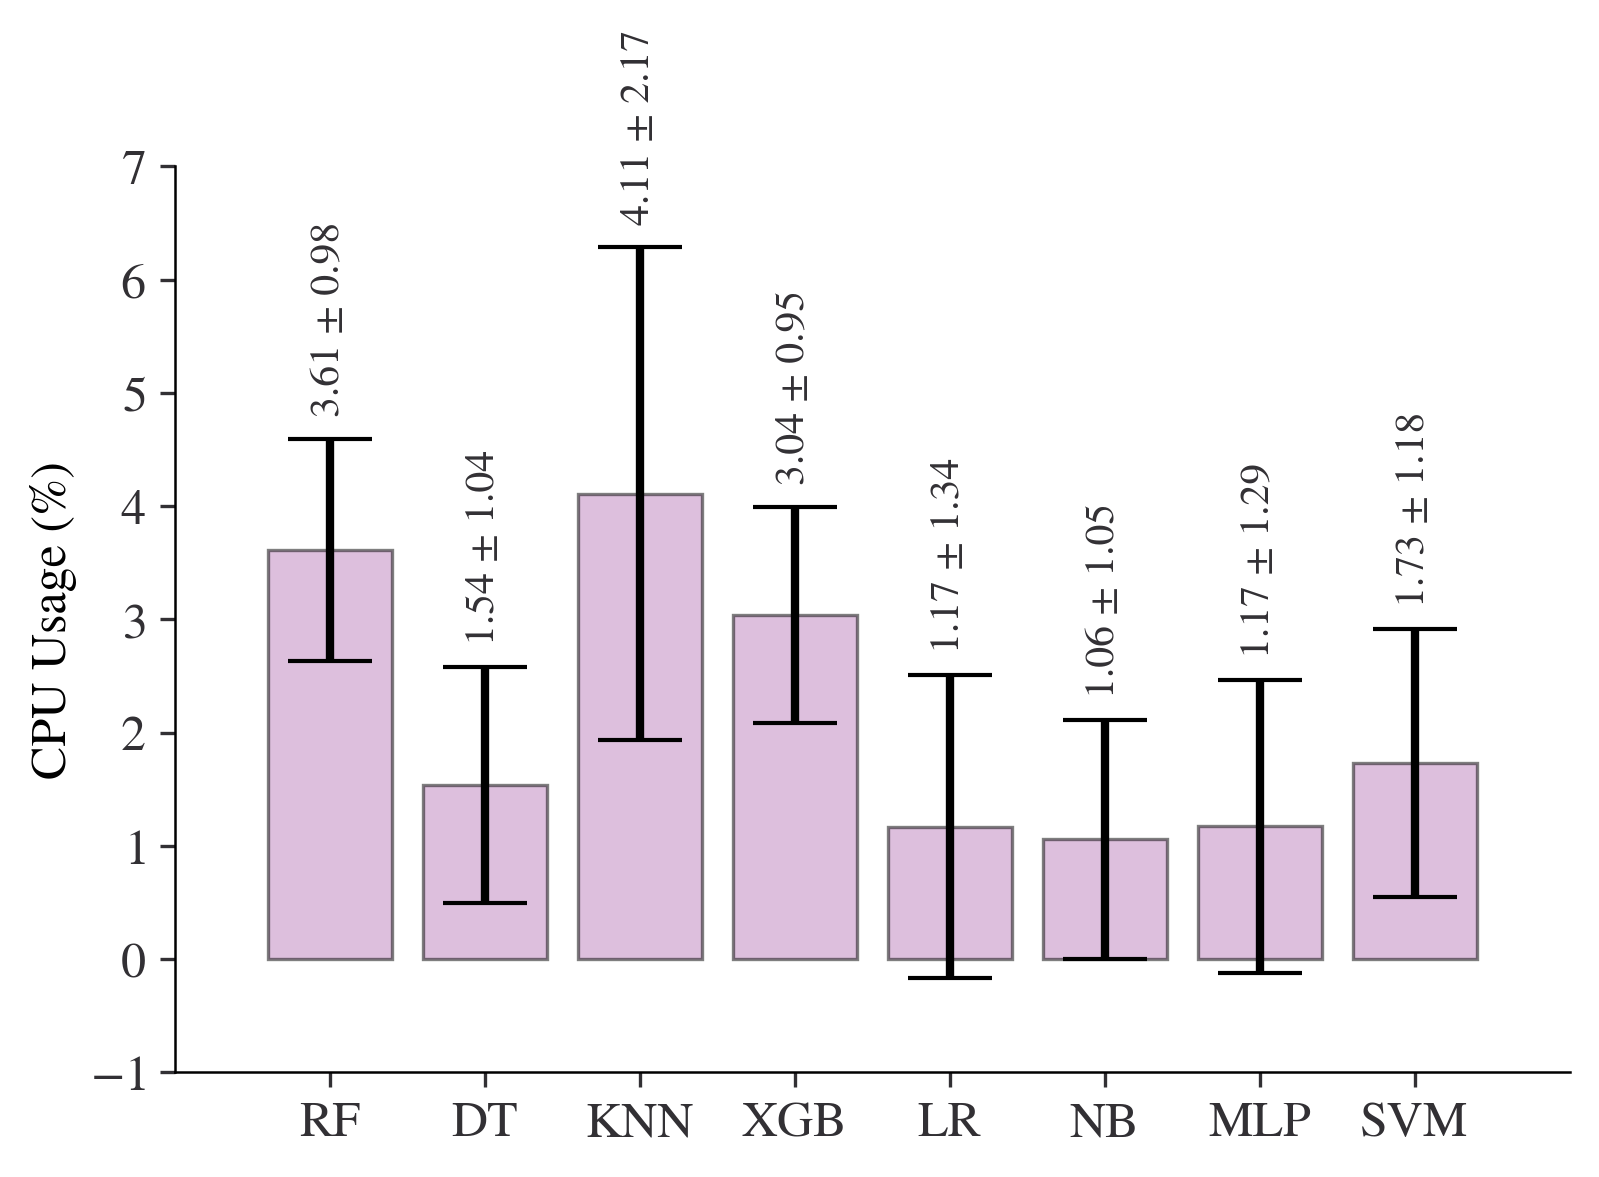

In [8]:
import os
fig, ax = plt.subplots()
ax.bar(x_pos, sys_mean, yerr=sys_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('CPU Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(sys_mean)):
    plt.text(i, sys_mean[i]+sys_std[i]+0.2, str(round(sys_mean[i],2))+" ± "+str(round(sys_std[i],2)), ha="center", va="bottom", rotation=90)
plt.savefig(os.path.join('images/', 'cpu_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

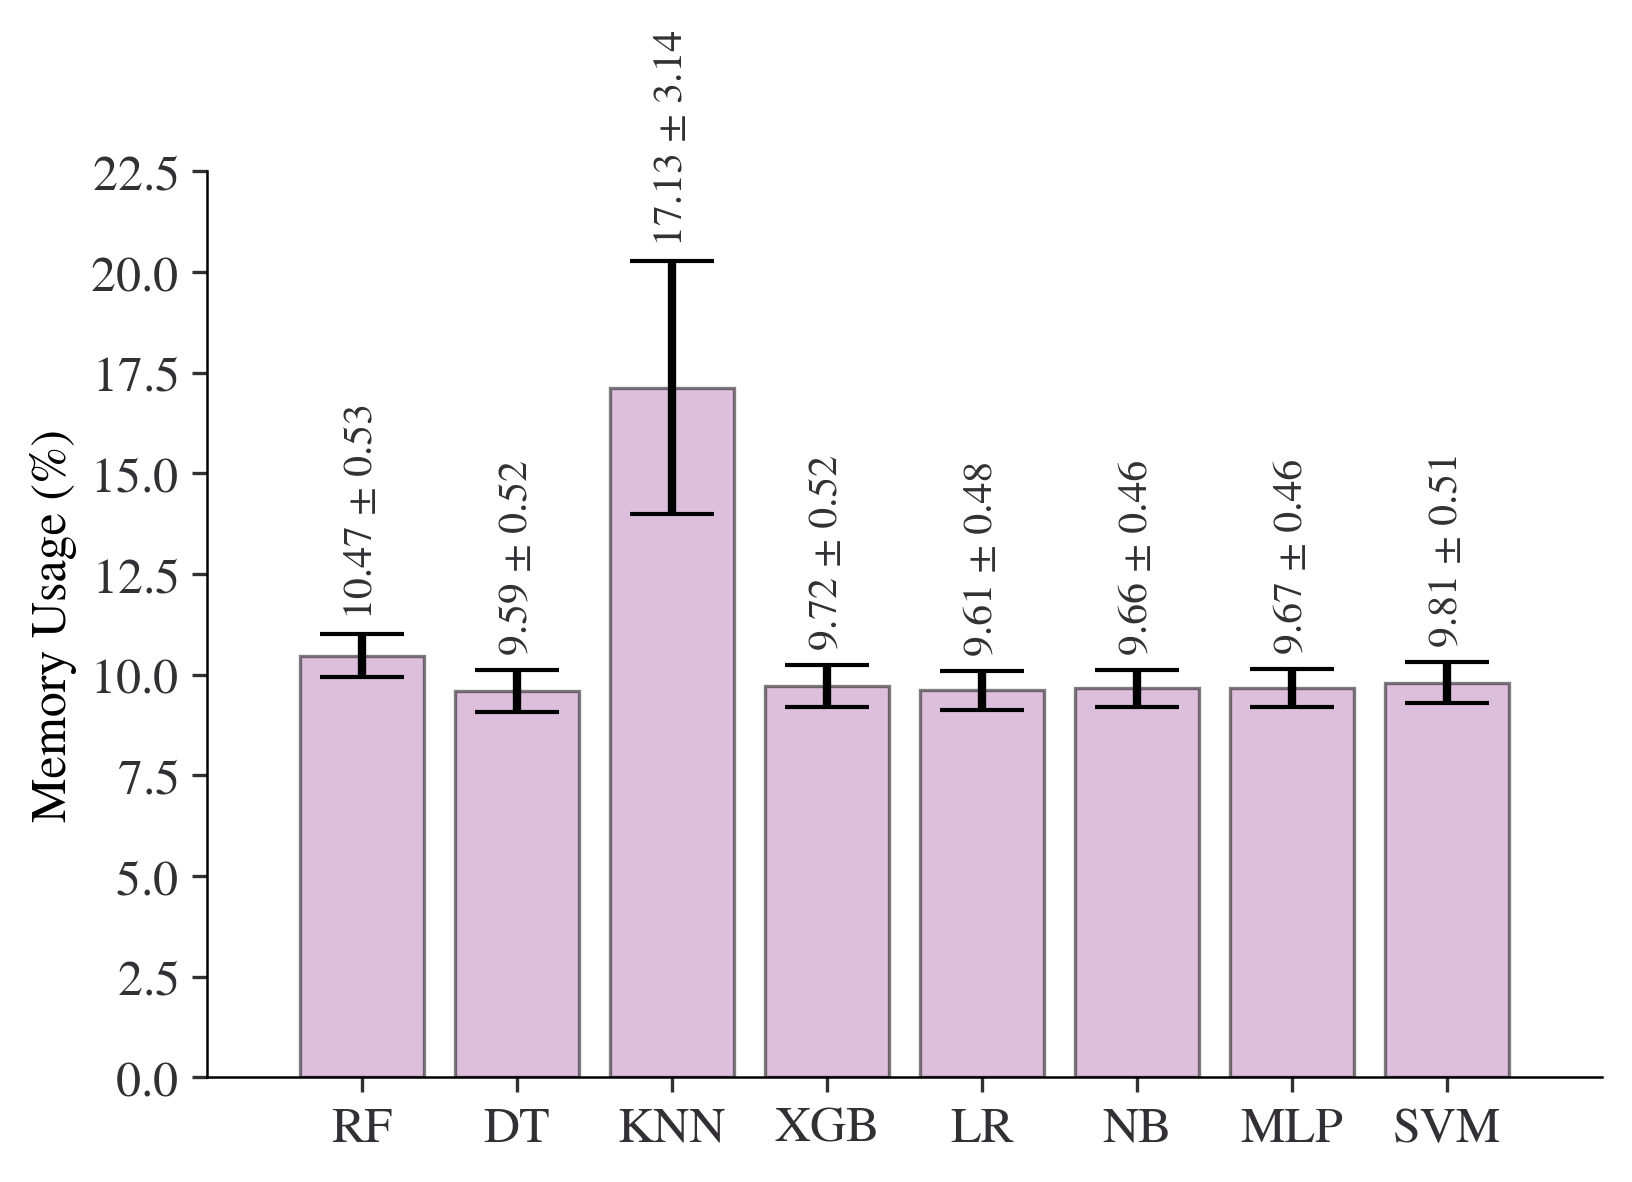

In [11]:
x_pos = np.arange(len(models))
mem_mean = [value['mem_mean'] for value in data.values()]
mem_std = [value['mem_std'] for value in data.values()]

fig, ax = plt.subplots()
ax.bar(x_pos, mem_mean, yerr=mem_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Memory Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
for i in range(0, len(mem_mean)):
    plt.text(i, mem_mean[i]+mem_std[i]+0.4, str(round(mem_mean[i],2))+" ± "+str(round(mem_std[i],2)), ha="center", va="bottom", rotation=90)
plt.savefig(os.path.join('images/', 'mem_usage_ml_models.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---

## Violin and Boxplot

In [15]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys" : df[features]['%sys'], 
                    "mem" : df[features]['%memused'], 
                  }


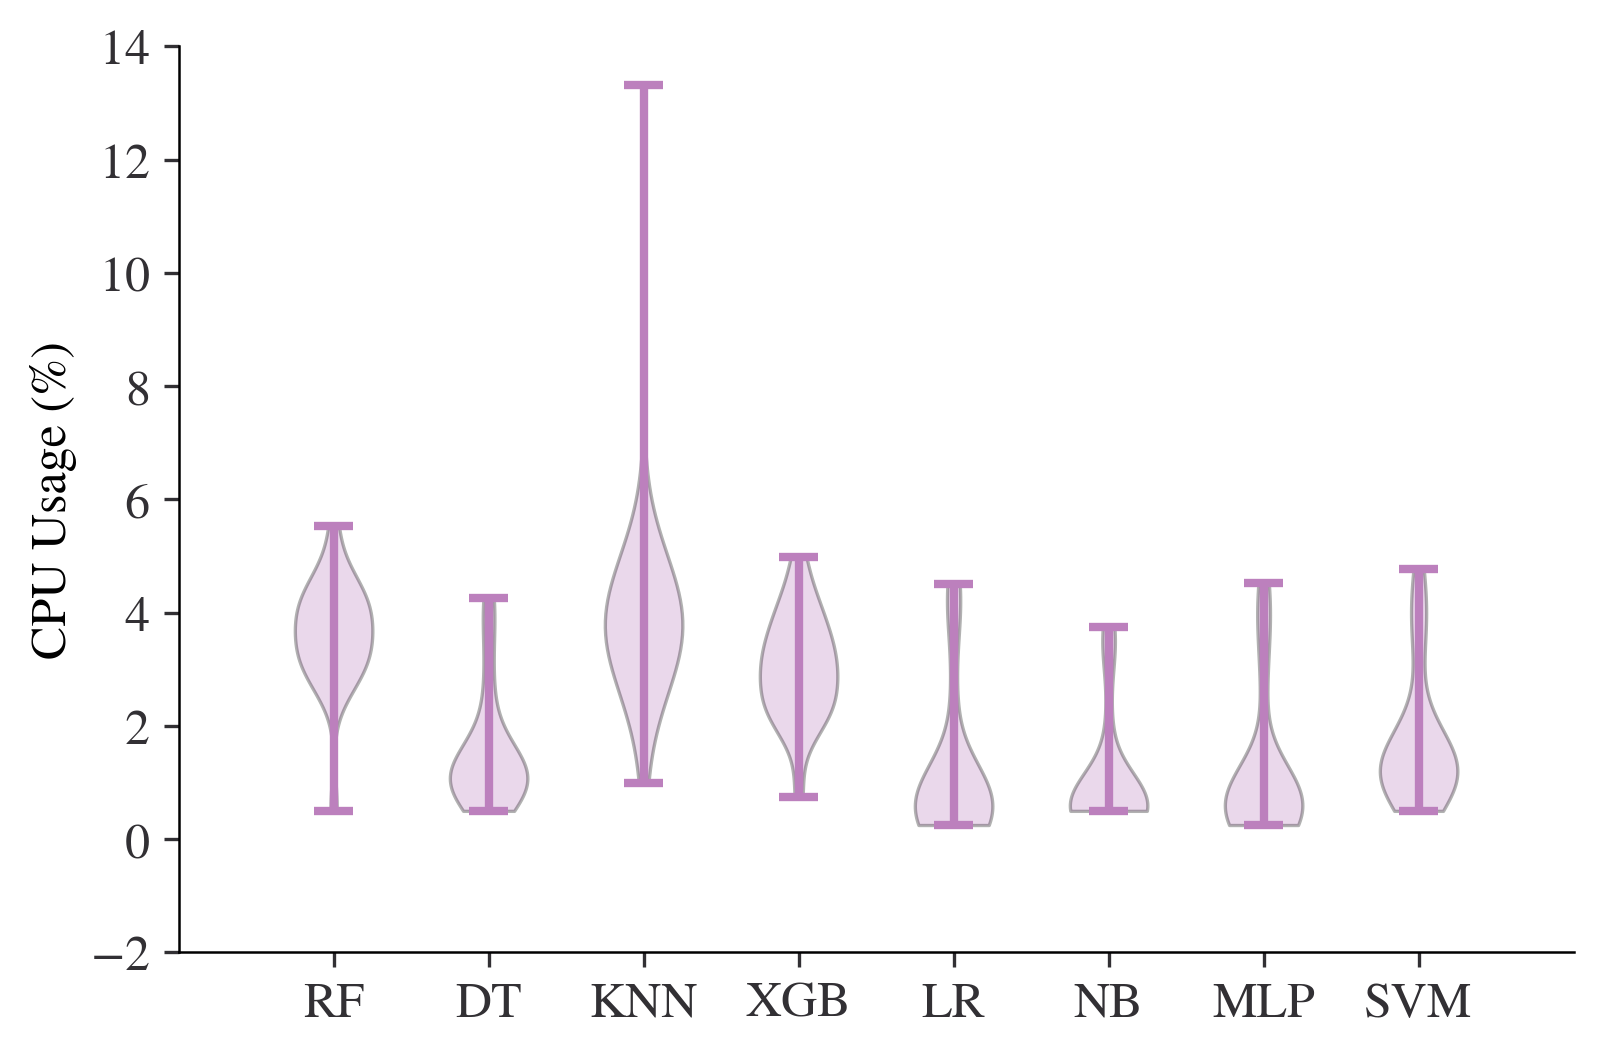

In [81]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.violinplot(plot_sys);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

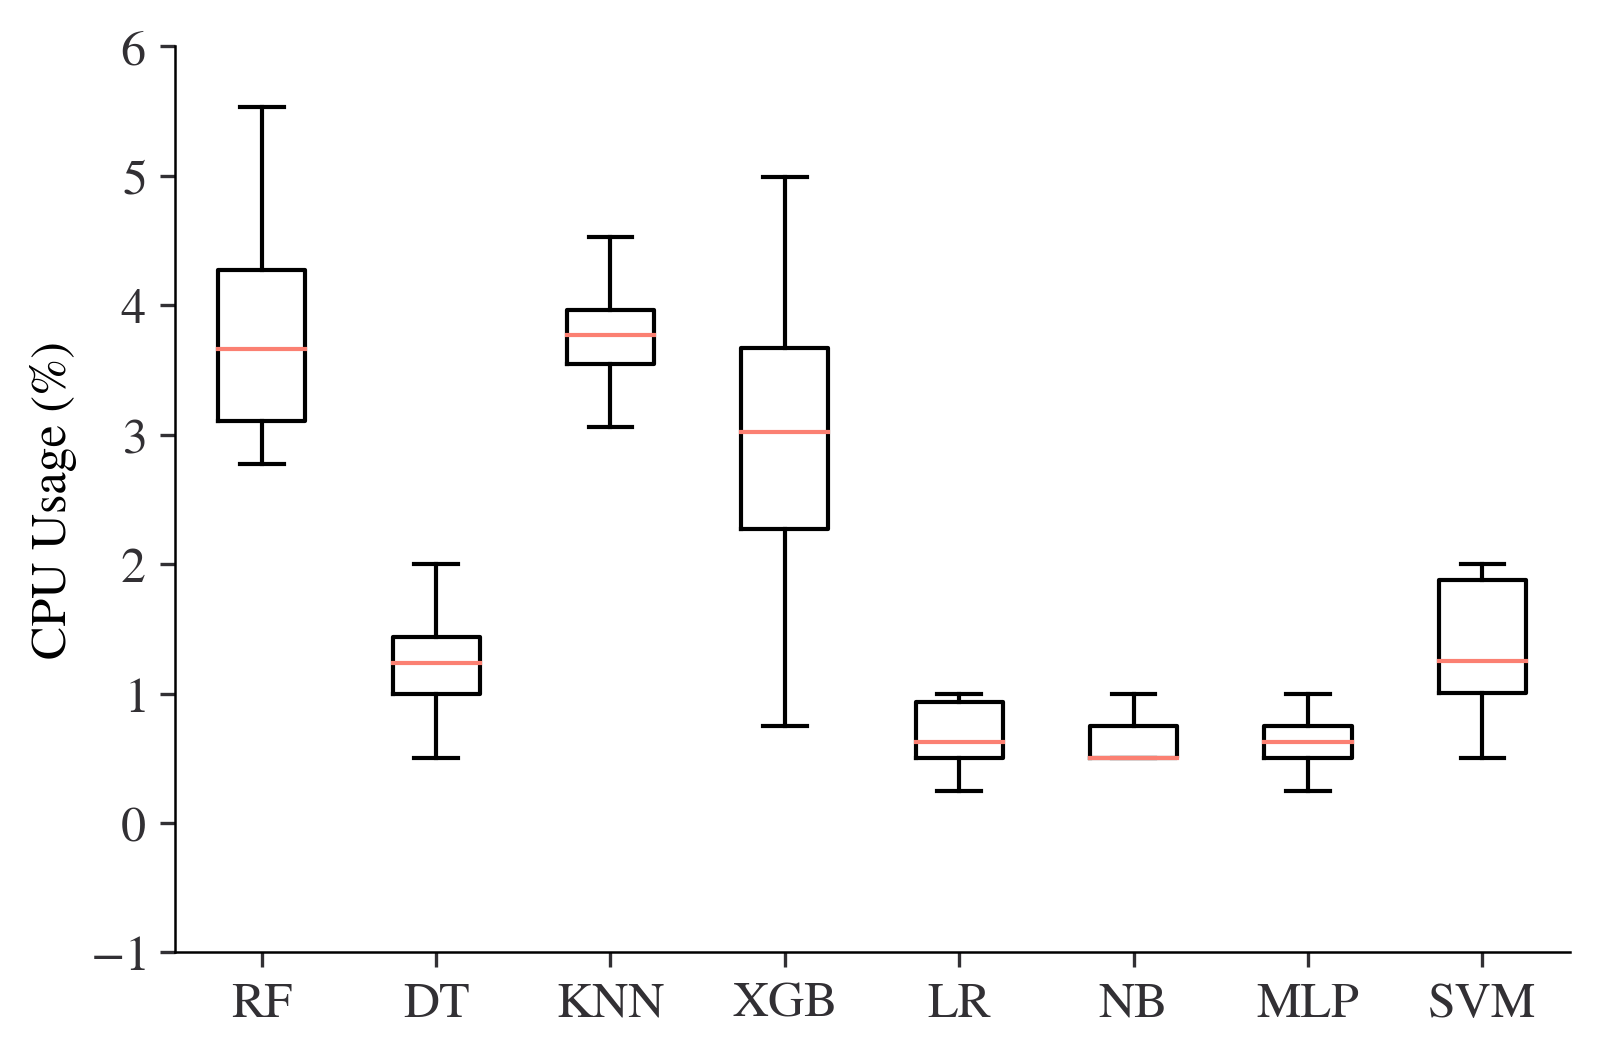

In [89]:
plot_sys = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_sys.append(data[model]['sys'])

ax.set_ylabel('CPU Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)



ax.boxplot(plot_sys, showfliers=False);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'cpu_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

In [43]:
[model.upper() for model in models]

['RF', 'DT', 'KNN', 'XGB', 'LR', 'NB', 'MLP', 'SVM']

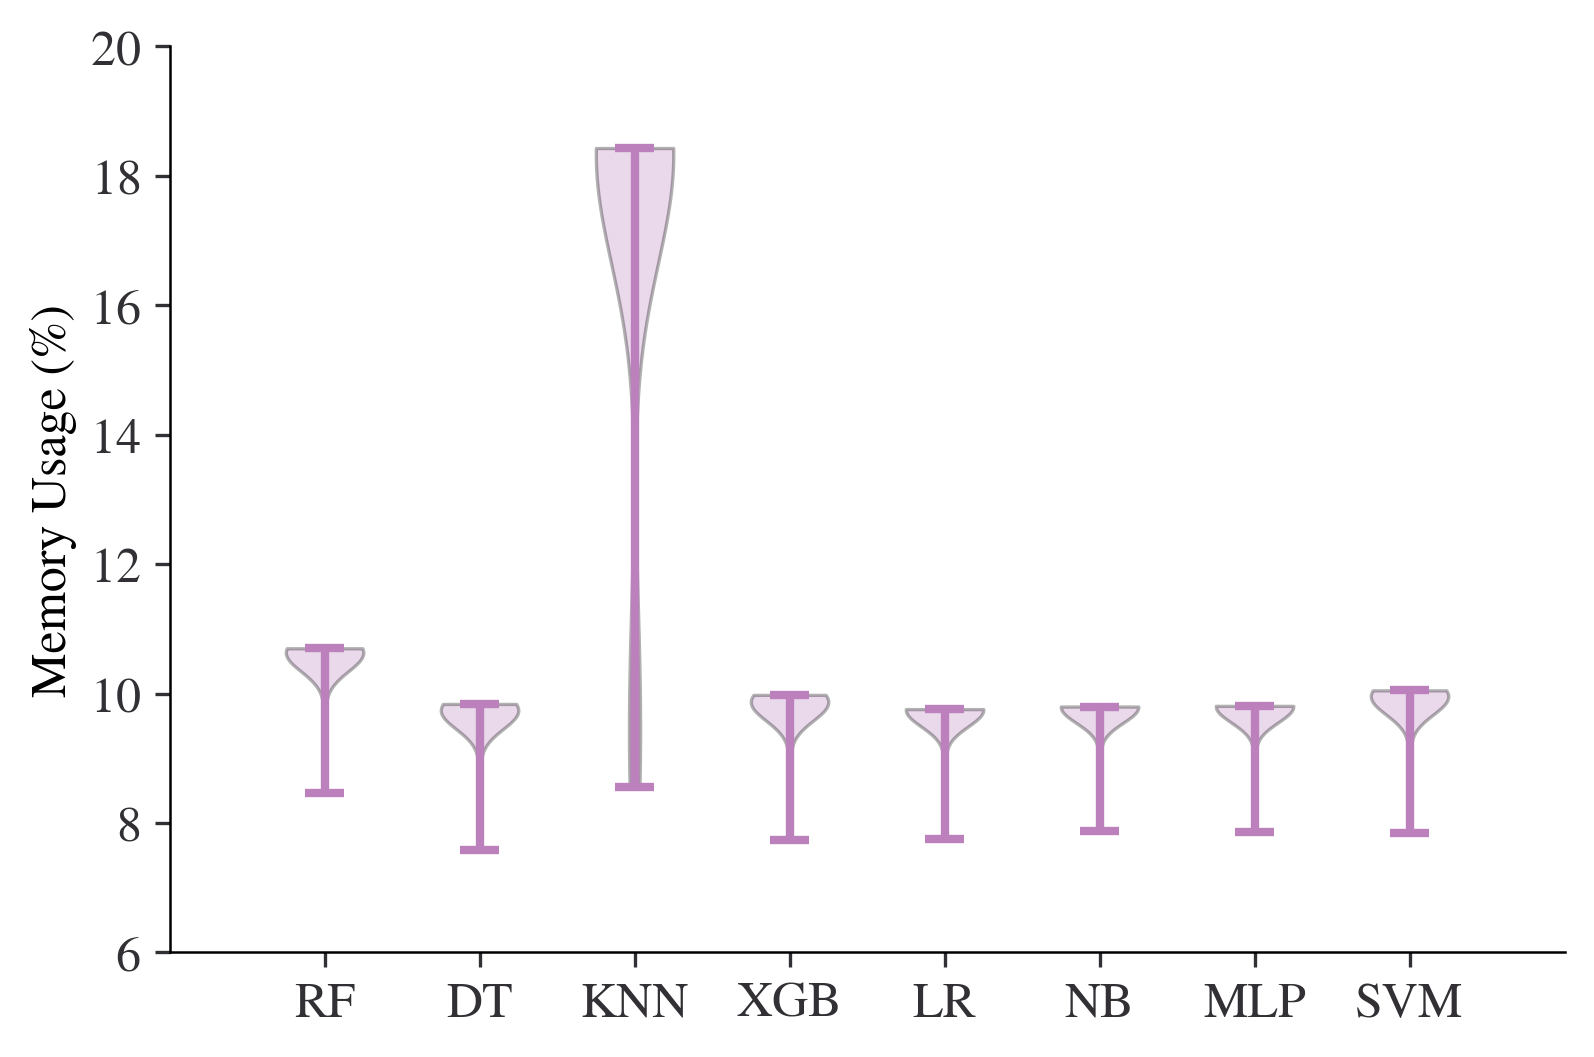

In [73]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.violinplot(plot_mem);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_violin.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

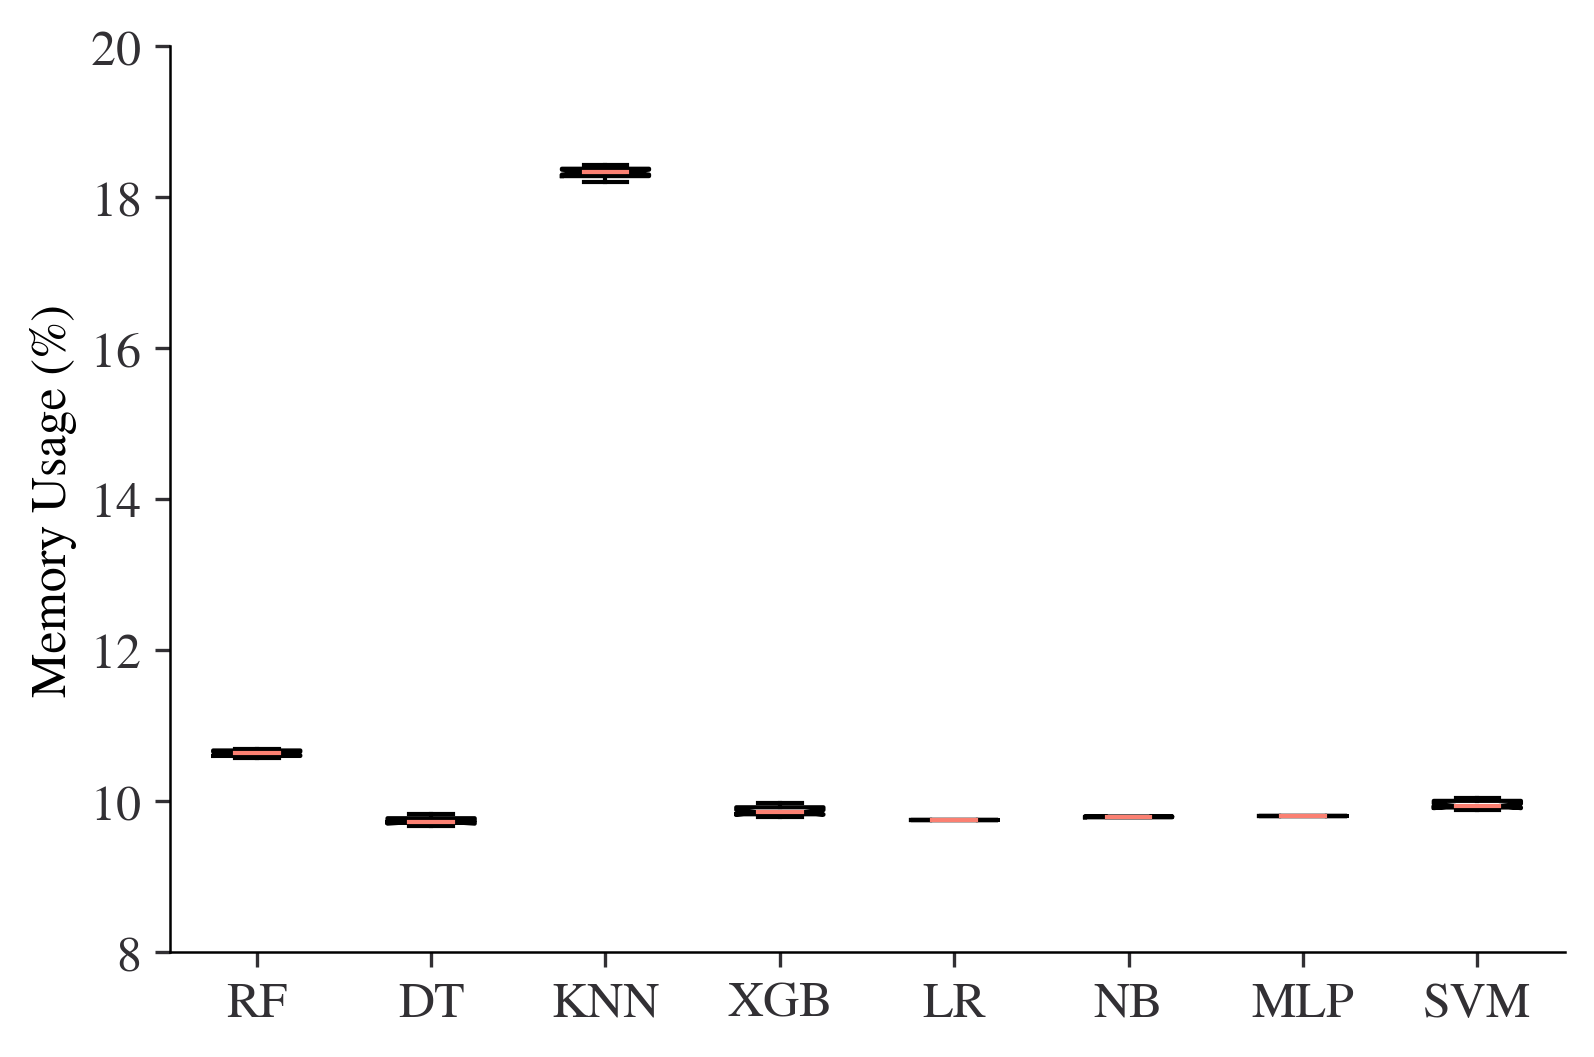

In [79]:
plot_mem = []

x_pos = np.arange(len(models))


fig, ax = plt.subplots()
for model in models:
    plot_mem.append(data[model]['mem'])

ax.set_ylabel('Memory Usage (%)')
#ax.set_xticks(x_pos+1)
#ax.set_xticklabels(model.upper() for model in models)

ax.boxplot(plot_mem, showfliers=False, notch=True);
plt.xticks(x_pos+1, [model.upper() for model in models])
#plt.savefig(os.path.join('images/', 'mem_usage_ml_models_boxplot.pdf'), dpi=300, bbox_inches = "tight")
plt.show()

---
## Confidence Interval

In [92]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [93]:
for metric in ['sys', 'mem']:
    for model in models:
        mean, bottom, top = mean_confidence_interval(data[model][metric])
        print(metric, model, mean, bottom, top, (mean>bottom and mean<top))

sys rf 3.610454545454546 3.176223864663848 4.044685226245243 True
sys dt 1.5363636363636362 1.0745342644740228 1.9981930082532495 True
sys knn 4.11 3.1458460264362764 5.074153973563725 True
sys xgb 3.0399999999999996 2.617447841538333 3.462552158461666 True
sys lr 1.170909090909091 0.5788193749799366 1.7629988068382452 True
sys nb 1.0586363636363636 0.5914769870475141 1.5257957402252131 True
sys mlp 1.1722727272727271 0.600319698945971 1.7442257555994831 True
sys svm 1.7322727272727276 1.2083767358634145 2.2561687186820407 True
mem rf 10.474090909090908 10.239895516569488 10.708286301612327 True
mem dt 9.585000000000003 9.353857947529558 9.816142052470447 True
mem knn 17.130454545454544 15.74011931676204 18.520789774147048 True
mem xgb 9.71590909090909 9.485957091286812 9.945861090531368 True
mem lr 9.609545454545453 9.396701286288494 9.822389622802412 True
mem nb 9.66 9.457535360356292 9.862464639643708 True
mem mlp 9.667727272727273 9.462270512385258 9.873184033069288 True
mem svm 9.